In [1]:
#Choose the ATLAS ML kernel from the dropdown menu!
import numpy as np
import h5py
import math
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Layer
from tensorflow.keras import backend as K

In [2]:
from func import load_model, save_model, SetStyle
SetStyle()

In [3]:
import pandas as pd
def convert_csv_to_hdf(csv_file_path, output_folder):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)
    
    # Specify the output HDF5 file name based on the CSV file name
    output_h5_file = os.path.join(output_folder, os.path.splitext(os.path.basename(csv_file_path))[0] + '.h5')

    # Write the DataFrame to the HDF5 file
    df.to_hdf(output_h5_file, key='data', mode='w')

# Path to the signal and background CSV files
signal_csv_file = '/Users/berit/Documents/CERN_files/ML_Final_project/tt.csv'
background_csv_file = '/Users/berit/Documents/CERN_files/ML_Final_project/bbjj.csv'

folder = os.path.join(os.path.expanduser('~'), 'Documents', 'CERN_files', 'ML_Final_project')

## Load background dataset

In [4]:
import argparse
import h5py
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
bkg = pd.read_csv('/Users/berit/Documents/CERN_files/ML_Final_project/bbjj-chi-sum.csv')
sgl = pd.read_csv('/Users/berit/Documents/CERN_files/ML_Final_project/tt-chi-sum.csv')
print(bkg.shape, sgl.shape)
print(bkg[:5])
print(sgl[:5])
# np.random.shuffle(bkg)

(500000, 36) (500000, 36)
   Unnamed: 0       j1pT     j1Eta     j1Phi  j1Flavor       j2pT     j2Eta  \
0           0  85.834840  0.471457  3.009400       2.0  79.411500 -1.969174   
1           1  76.809320  1.367238 -1.238460       3.0  39.631306 -0.479186   
2           2  62.026787 -2.133176 -1.111449       1.0  61.180256 -1.470241   
3           3  95.256660 -2.886862 -0.413584       0.0  65.083270 -0.945389   
4           4  44.625465 -1.123809  1.781627       2.0  43.903984 -1.140815   

      j2Phi  j2Flavor       j3pT  ...        j13M        j14M        j25M  \
0 -0.889798       5.0  61.872658  ...  467.731612  236.970043  115.608458   
1  1.974174       5.0  36.492840  ...  139.323457  316.882602   65.088246   
2  2.051362       5.0  57.227180  ...  281.340628  157.846696  150.744354   
3  2.566800       5.0  50.502686  ...  308.269590  612.408738  114.985517   
4 -2.551404       5.0  39.302780  ...   87.065199  160.917427   79.104163   

         j23M        j24M        j34

In [6]:
sgl.drop(['Unnamed: 0', 'j12M', 'j13M', 'j14M', 'j23M', 'j24M','j25M','j34M','j35M','j45M'], axis=1, inplace=True) #'Unnamed: 0.1', 'Unnamed: 0'
bkg.drop(['Unnamed: 0', 'j12M', 'j13M', 'j14M', 'j23M', 'j24M','j25M','j34M','j35M','j45M'], axis=1, inplace=True)

In [7]:
sgl

j1pT     j1Eta     j1Phi  j1Flavor        j2pT     j2Eta  \
0       162.263890 -1.092297 -0.952842       2.0  139.561260 -2.409798   
1       154.404980  0.001693  1.833606       5.0  105.295100  0.885712   
2        87.737250  3.681731  2.383323       0.0   82.089730  1.987402   
3        51.454240  0.160003 -0.893540       4.0   45.288254 -0.415642   
4       139.175830  0.561386  1.441161       5.0   94.589386 -0.963595   
...            ...       ...       ...       ...         ...       ...   
499995   99.593346  1.508171 -2.542113       5.0   65.202820  0.509783   
499996   58.701828  1.549118 -2.995559       4.0   54.947388  2.902621   
499997  494.841030  0.180733  1.753500       5.0  311.790770 -0.425732   
499998   67.392480 -1.426903  2.755853       3.0   66.505910 -1.802164   
499999   94.225360  0.111708 -2.119072       4.0   56.285240 -0.903757   

           j2Phi  j2Flavor        j3pT     j3Eta  ...       j5pT     j5Eta  \
0       0.829349       2.0  116.450700 -1.139799  ...  53.587246 -0.608925   
1       0.106359       5.0   86.319320  1.034582  ...  49.704876  1.530574   
2      -0.093771       2.0   74.628100  0.714755  ...  33.293915 -0.707231   
3      -2.510715       5.0   42.065100  0.537302  ...  35.881990  1.554802   
4      -0.617385       1.0   66.858860 -1.085015  ...  56.500740 -0.449168   
...          ...       ...         ...       ...  ...        ...       ...   
499995 -0.189145       5.0   58.171154 -0.301240  ...  23.139212  0.942043   
499996 -1.307588       0.0   52.247173  1.505770  ...  28.171984  2.403815   
499997 -1.255082       5.0  145.194400 -0.489993  ...  32.785122 -0.929898   
499998 -2.044798       1.0   61.920338  0.084876  ...  29.763401 -1.228343   
499999 -1.416443       5.0   55.955296 -0.730069  ...  32.454740  0.208378   

           j5Phi  j5Flavor       j6pT     j6Eta     j6Phi  j6Flavor  \
0      -1.656560       1.0  29.829798 -1.926705  1.983437       1.0   
1      -0.463497       2.0  47.693268  2.179503 -2.401871       2.0   
2       1.766892      21.0  29.495180  1.820474 -2.447543       1.0   
3      -0.064525       5.0  23.653790  0.045364 -2.965895       3.0   
4       0.435057       2.0  27.440659 -0.165192 -2.349170       2.0   
...          ...       ...        ...       ...       ...       ...   
499995  1.015306       4.0  22.983448 -0.012408 -0.274894       2.0   
499996  1.644721       5.0  27.730663  2.474811 -0.347526       5.0   
499997  1.469437       2.0  25.175972 -1.429774 -1.649067       2.0   
499998 -0.312944       2.0  24.842695 -0.513358 -0.112963       5.0   
499999  3.005651       3.0  25.952517 -2.555416  0.998031      21.0   

              Chi-W        Chi-T  
0       1431.347799   687.006083  
1        220.396964    28.661110  
2       3854.844042  2719.051174  
3          9.316999   208.231537  
4        173.441453    67.307062  
...             ...          ...  
499995    76.395086   167.194275  
499996   502.707050   142.686437  
499997  1775.733094  1070.717611  
499998    90.108777    85.052838  
499999    18.825294   162.874682  

[500000 rows x 26 columns]

In [8]:
sgl.to_csv('modified_signal.csv', index=False)
bkg.to_csv('modified_background.csv', index=False)

In [9]:
convert_csv_to_hdf('modified_signal.csv', folder)
convert_csv_to_hdf('modified_background.csv', folder)

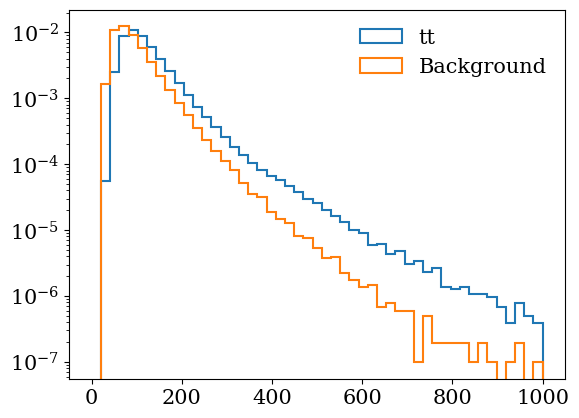

In [10]:
binning=np.linspace(0,1000,50)
# print(sgl)
plt.hist(sgl.iloc[:, 0] , bins=binning, label='tt', density = True, histtype='step', fill=False, linewidth=1.5)
plt.hist(bkg.iloc[:, 0], bins=binning, label="Background", density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.legend()
plt.show()

In [35]:
dataset_folder = '/Users/berit/src/Anomaly-Detection/' #Documents/CERN_files/ML_Final_project/'
#Be sure to run first if you want to make your own files
# python create_datasets.py --bkg_file '/Users/berit/Documents/CERN_files/ML_Final_project/modified_background.h5' --output_bkg_name 'mod_BKG' --signals_files '/Users/berit/Documents/CERN_files/ML_Final_project/modified_signal.h5' --output_signal_names 'mod_sgl' --events=500000
filename = 'mod_BKG_dataset.h5' #BKG_dataset.h5

In [12]:
# make sure input data has correct input shape - background training data
with h5py.File(dataset_folder+filename, 'r') as file:
    X_train = np.array(file['X_train'])
    X_test = np.array(file['X_test'])
    X_val = np.array(file['X_val'])

In [13]:
print(dataset_folder)
print(filename, len(X_train))

/Users/berit/src/Anomaly-Detection/
mod_BKG_dataset.h5 320000


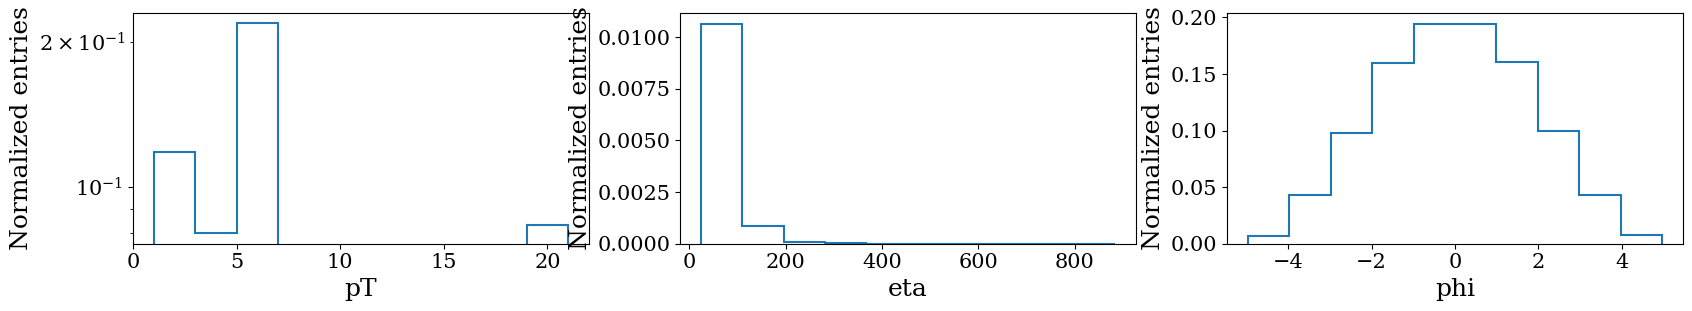

In [14]:
#Let's plot some histograms
plt.figure(figsize=(20,3))
logy_dict = {'pT':True,'eta':False,'phi':False}
for i,name in enumerate(logy_dict):
    plt.subplot(1,3,i+1)
    to_plot=X_train[:,3+i]
    to_plot=to_plot[to_plot!=0]
    plt.hist(to_plot.flatten(),label="Background", density = True, histtype='step', fill=False, linewidth=1.5)
    if logy_dict[name]:plt.yscale('log')
    plt.xlabel(name)
    plt.ylabel("Normalized entries")


## Let's build an autoencoder with fully-connected layers <img src="assets/autoencoder.png" width=400 height=400 />


In [15]:
input_shape = 26
latent_dimension = 8
num_nodes=[64,16] #32,16
activation='relu'

In [16]:
#encoder
inputArray = Input(shape=(input_shape))
x = Dense(num_nodes[0], use_bias=False,activation=activation)(inputArray)
x = Dense(num_nodes[1], use_bias=False,activation=activation)(x)
encoder = Dense(latent_dimension, use_bias=False,activation=activation)(x)

#decoder
x = Dense(num_nodes[1], use_bias=False,activation=activation)(encoder)
x = Dense(num_nodes[0], use_bias=False,activation=activation)(x)
decoder = Dense(input_shape)(x)

#create autoencoder
autoencoder = Model(inputs = inputArray, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 16)                1024      
                                                                 
 dense_2 (Dense)             (None, 8)                 128       
                                                                 
 dense_3 (Dense)             (None, 16)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                1024      
                                                                 
 dense_5 (Dense)             (None, 26)                1690  

In [17]:
autoencoder.compile(optimizer = keras.optimizers.Adam(), loss='mse')

## Trainining and saving the model

In [18]:
EPOCHS = 50 #50
BATCH_SIZE = 5000 #10000

In [19]:
history = autoencoder.fit(X_train, X_train, epochs = EPOCHS, batch_size = BATCH_SIZE,
                  validation_data=(X_val, X_val))

Epoch 1/50
64/64 [==============================] - 0s 3ms/step - loss: 375032.2188 - val_loss: 9627.3486
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 4047.4211 - val_loss: 2690.1287
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 2014.6958 - val_loss: 1186.0051
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 568.0170 - val_loss: 176.2622
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 121.2847 - val_loss: 98.4547
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 82.7315 - val_loss: 73.6383
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 70.5705 - val_loss: 66.1738
Epoch 8/50
64/64 [==============================] - 0s 3ms/step - loss: 64.9833 - val_loss: 62.1319
Epoch 9/50
64/64 [==============================] - 0s 3ms/step - loss: 61.5278 - val_loss: 59.4196
Epoch 10/50
64/64 [==============================] - 0s 3ms/step - loss: 59.6567 - 

In [20]:
model_name = 'DNN_AE'
model_directory = 'DNNS/'
if not os.path.exists(model_directory+model_name):
    os.makedirs(model_directory+model_name)
save_model(model_directory+model_name, autoencoder)

## Let's take a look at the reconstruction for the background

In [21]:
bkg_prediction = autoencoder.predict(X_test,batch_size=5000) #1000

20/20 [==============================] - 0s 1ms/step


## Now let's take a look at the signals! <img src="assets/NP.png" width=800 height=200 />

In [22]:
# add correct signal labels: defined within the h5 file created by the data processing script
signal_labels = ['tt']
# add correct path to signal files
signals_file = 'mod_sgl_dataset.h5' #sgl_dataset.h5.h5

In [23]:
# read signal data
signal_data = []
with h5py.File(dataset_folder+signals_file, 'r+') as file:
    test_data = np.array(file['Data']) #['data']['block1_values']
signal_data.append(test_data)
print(signal_data[:5])

[array([[ 1.62263890e+02, -1.09229730e+00, -9.52841760e-01, ...,
         1.00000000e+00,  1.43134780e+03,  6.87006083e+02],
       [ 1.54404980e+02,  1.69295250e-03,  1.83360600e+00, ...,
         2.00000000e+00,  2.20396964e+02,  2.86611097e+01],
       [ 8.77372500e+01,  3.68173050e+00,  2.38332320e+00, ...,
         1.00000000e+00,  3.85484404e+03,  2.71905117e+03],
       ...,
       [ 4.94841030e+02,  1.80733340e-01,  1.75350030e+00, ...,
         2.00000000e+00,  1.77573309e+03,  1.07071761e+03],
       [ 6.73924800e+01, -1.42690320e+00,  2.75585340e+00, ...,
         5.00000000e+00,  9.01087769e+01,  8.50528385e+01],
       [ 9.42253600e+01,  1.11708105e-01, -2.11907170e+00, ...,
         2.10000000e+01,  1.88252945e+01,  1.62874682e+02]])]


In [24]:
signal_results = []
for i, label in enumerate(signal_labels):
    signal_prediction = autoencoder.predict(signal_data[:],batch_size=5000)
    signal_results.append([label, signal_data[:], signal_prediction]) # save [label, true, prediction] for signal

100/100 [==============================] - 0s 1ms/step


## Before looking into the results, let's save the trained model in case we want to use it again

In [25]:
save_file = 'dnn_results'
for i in enumerate(signal_labels):
    print(i[1])

tt


In [26]:
with h5py.File(save_file, 'w') as file:
    file.create_dataset('BKG_input', data=X_test)
    file.create_dataset('BKG_predicted', data = bkg_prediction)
    for i, sig in enumerate(signal_results):
        file.create_dataset('%s_input' %sig[0], data=sig[1])
        file.create_dataset('%s_predicted' %sig[0], data=sig[2])

# Evaluating the autoencoder

## Let's take a look at the reconstruction error for the different signals and background

In [27]:
from func import mse_loss

In [28]:
# compute loss value (true, predicted)
total_loss = []
total_loss.append(mse_loss(X_test, bkg_prediction))
for i, signal_X in enumerate(signal_data):
    total_loss.append(mse_loss(signal_X, signal_results[0][2])) #signal_data[0]
print(total_loss[:2])

[array([14.9231736 , 19.9645425 , 26.19379052, ..., 30.6504122 ,
       17.49500221, 26.85286887]), array([75.14164091, 47.54897977, 29.20926739, ..., 91.87252081,
       16.29087492, 19.95018006])]


[array([14.9231736 , 19.9645425 , 26.19379052, ..., 30.6504122 ,
       17.49500221, 26.85286887]), array([75.14164091, 47.54897977, 29.20926739, ..., 91.87252081,
       16.29087492, 19.95018006])]


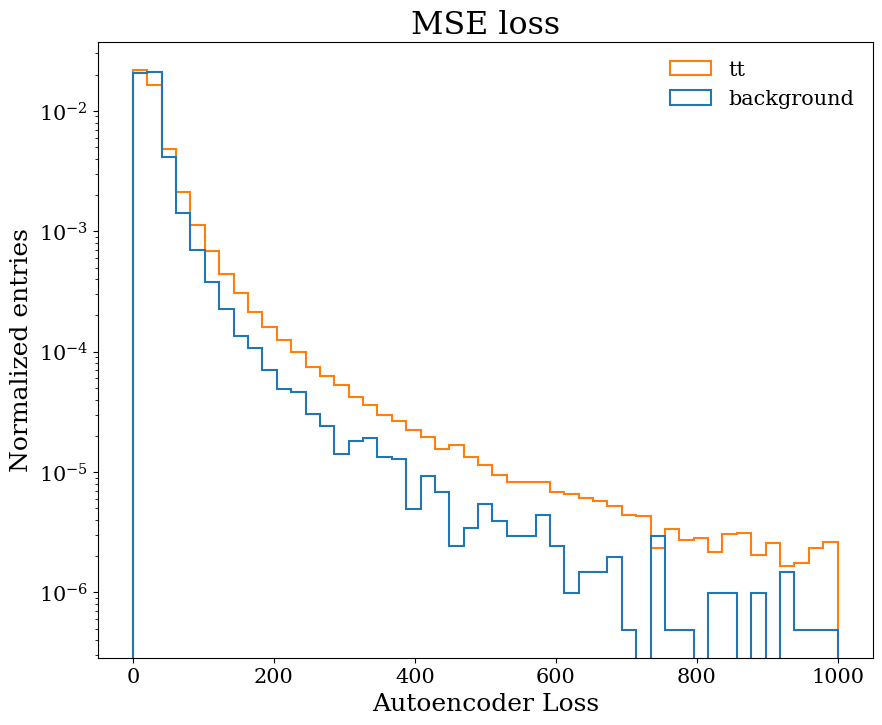

In [29]:
plt.figure(figsize=(10,8))
print(total_loss)
plt.hist(total_loss, bins=binning, label=['background','tt'], density = True, histtype='step', fill=False, linewidth=1.5) #, label='tt2'
plt.yscale('log')
plt.xlabel("Autoencoder Loss")
plt.ylabel("Normalized entries")
plt.title('MSE loss')
plt.legend(loc='best')
plt.show()

## Let's now make a Receiver Operating Characteristic (ROC) curve

In [30]:
from sklearn.metrics import roc_curve, auc

In [31]:
labels = np.concatenate([['Background'], np.array(signal_labels)])

['Background' 'tt']


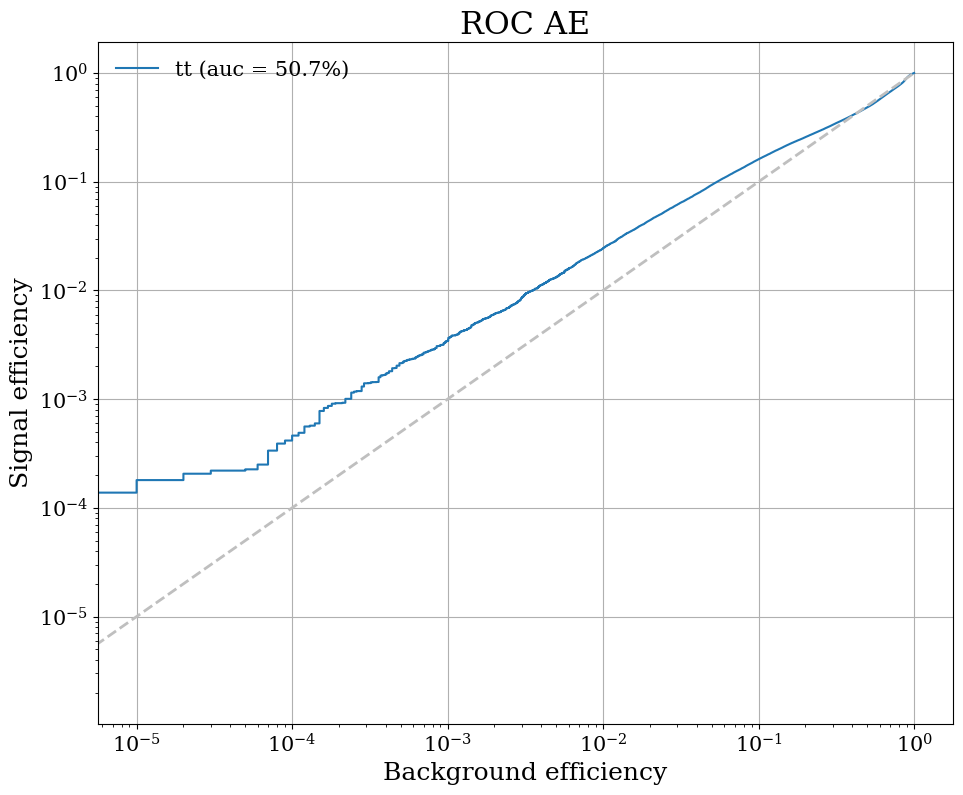

In [32]:
target_background = np.zeros(total_loss[0].shape[0])
print(labels)
plt.figure(figsize=(10,8))
for i, label in enumerate(labels):
    if i == 0: continue # background events
    
    trueVal = np.concatenate((np.ones(total_loss[i].shape[0]), target_background)) # anomaly=1, bkg=0
    predVal_loss = np.concatenate((total_loss[i], total_loss[0]))

    fpr_loss, tpr_loss, threshold_loss = roc_curve(trueVal, predVal_loss)

    auc_loss = auc(fpr_loss, tpr_loss)
    
    plt.plot(fpr_loss, tpr_loss, "-", label='%s (auc = %.1f%%)'%(label,auc_loss*100.), linewidth=1.5)
    
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("Signal efficiency")
    plt.xlabel("Background efficiency")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
plt.plot(np.linspace(0, 1),np.linspace(0, 1), '--', color='0.75')
plt.title("ROC AE")
plt.show()

## Let's now make a Significance Improvement (SIC) curve

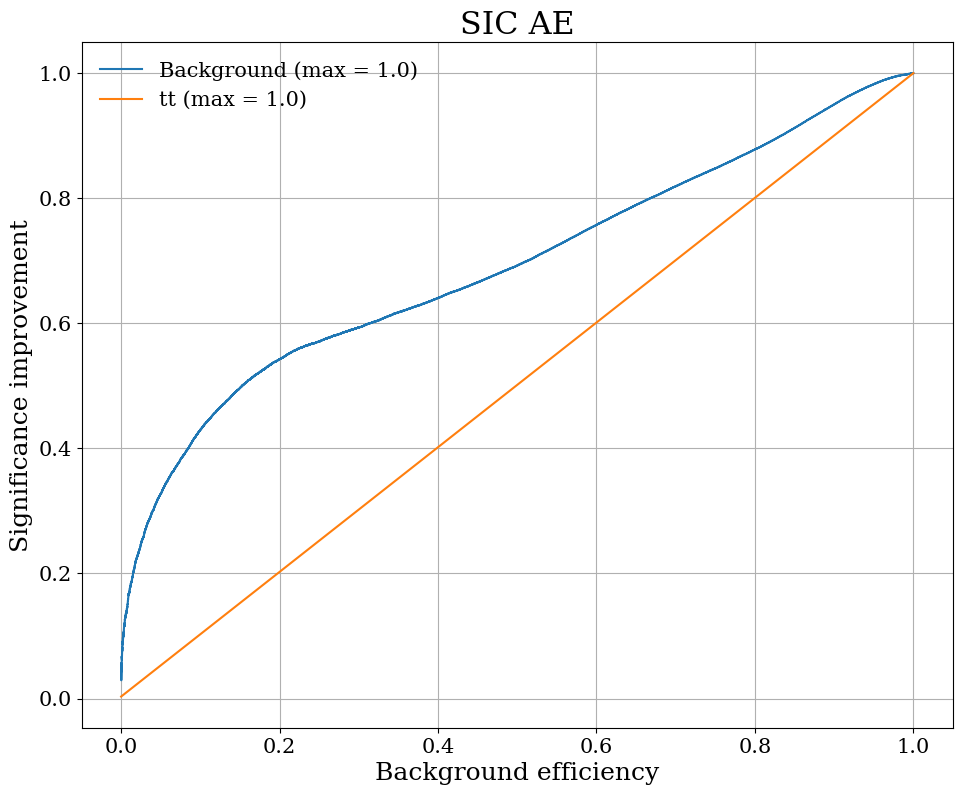

In [33]:
target_background = np.zeros(total_loss[0].shape[0])

plt.figure(figsize=(10,8))
for i, label in enumerate(labels):
    # if i == 0: continue # background events
    
    trueVal = np.concatenate((np.ones(total_loss[i-1].shape[0]), target_background)) # anomaly=1, bkg=0
    predVal_loss = np.concatenate((total_loss[i-1], total_loss[0]))

    fpr_loss, tpr_loss, threshold_loss = roc_curve(trueVal, predVal_loss)    
    plt.plot(tpr_loss,np.ma.divide(tpr_loss,np.sqrt(fpr_loss)), "-", label='%s (max = %.1f)'%(label,np.max(np.ma.divide(tpr_loss,np.sqrt(fpr_loss)))), linewidth=1.5)
    

    plt.ylabel("Significance improvement")
    plt.xlabel("Background efficiency")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
plt.title("SIC AE")
plt.show()